## Binary Classification: Breast Cancer Wisconsin Dataset
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

** Dataset Information: **

characteristics of the cell nuclei from a digitized image of a fine needle aspirate (FNA) of a breast mass (total 569 instances). 

** Attribute Information: (30 features and 1 class)**

1. ID number 
2. Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus: 

a) radius (mean of distances from center to points on the perimeter) 
b) texture (standard deviation of gray-scale values) 
c) perimeter 
d) area 
e) smoothness (local variation in radius lengths) 
f) compactness (perimeter^2 / area - 1.0) 
g) concavity (severity of concave portions of the contour) 
h) concave points (number of concave portions of the contour) 
i) symmetry 
j) fractal dimension ("coastline approximation" - 1)

** Objective of this project **

predict whether a patient's breast tumor is malignant or benign (class; M or B) based on cell nuclei characteristics (features)

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
df = pd.read_csv(url,header=None)

In [4]:
# Inspect Data
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 32)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
0     569 non-null int64
1     569 non-null object
2     569 non-null float64
3     569 non-null float64
4     569 non-null float64
5     569 non-null float64
6     569 non-null float64
7     569 non-null float64
8     569 non-null float64
9     569 non-null float64
10    569 non-null float64
11    569 non-null float64
12    569 non-null float64
13    569 non-null float64
14    569 non-null float64
15    569 non-null float64
16    569 non-null float64
17    569 non-null float64
18    569 non-null float64
19    569 non-null float64
20    569 non-null float64
21    569 non-null float64
22    569 non-null float64
23    569 non-null float64
24    569 non-null float64
25    569 non-null float64
26    569 non-null float64
27    569 non-null float64
28    569 non-null float64
29    569 non-null float64
30    569 non-null float64
31    569 non-null float64
dtypes: float64(30), int64(1), obj

In [11]:
df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df[1].value_counts() #imbalanced classes-->stratify

B    357
M    212
Name: 1, dtype: int64

In [5]:
df.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

## Data preprocessing

In [3]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

** Split Features & Class (or target) **

In [4]:
X = df.iloc[:,2:].values
#categorical to dummy variable
y = pd.get_dummies(df.iloc[:,1],drop_first=True).values.ravel()
print(X.shape,y.shape)

(569, 30) (569,)


** Split Train Test Sets **

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [6]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=uint8), array([285, 170], dtype=int64))

** Scale features **

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Model

### SVM: best ML algorithm

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC(C=10.0, kernel='rbf', gamma=0.01)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of training set: 98.9%
Accuracy of test set: 97.4%


### Baseline MLP model

In [9]:
# Import libraries
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold,GridSearchCV,StratifiedKFold

Using TensorFlow backend.


In [14]:
# Select baseline model architecture (layers, neurons) using gs
K.clear_session()
np.random.seed(seed) 
# Create model
def create_model(hidden_layer_sizes):
    K.clear_session()
    np.random.seed(seed)
    #
    model = Sequential()
    # add input & hidden layer1
    model.add(Dense(hidden_layer_sizes[0],input_shape=(X_train.shape[1],),
                   activation='tanh'))
    # add hidden layer2-N
    for layer_size in hidden_layer_sizes[1:]:
        model.add(Dense(layer_size, activation='tanh'))
    # add output layer
    model.add(Dense(1, activation='sigmoid'))
    # compiling
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    model.summary()
    return model
classifier = KerasClassifier(build_fn=create_model)

# Grid Search
hidden_layer_sizes = [[12,8], [12,8,4], [12,12,8,4], [30,15,12,8,4]]
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes)
kfold = StratifiedKFold(n_splits=3, random_state=seed)
grid = GridSearchCV(classifier, param_grid=param_grid, cv=kfold, verbose=1) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0,epochs=100)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________
303/303 [==============================] - 0s 26us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)             

304/304 [==============================] - 0s 39us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 1,732
Trainable params: 1,732
Non-trainable params: 0
__________________

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   26.8s finished


0.969231 (0.013471) with: {'hidden_layer_sizes': [12, 8]}
0.980220 (0.010755) with: {'hidden_layer_sizes': [12, 8, 4]}
0.980220 (0.018608) with: {'hidden_layer_sizes': [12, 12, 8, 4]}
0.975824 (0.006176) with: {'hidden_layer_sizes': [30, 15, 12, 8, 4]}
Best: 98.0% using {'hidden_layer_sizes': [12, 8, 4]}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


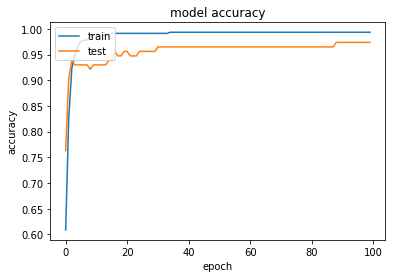

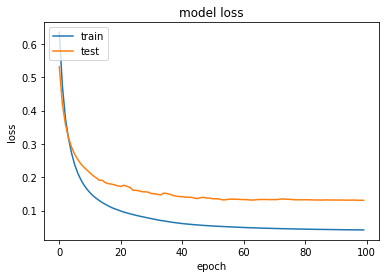

loss of train set: 0.042
accuracy of train set: 99.3%
loss of test set: 0.131
accuracy of test set: 97.4%


In [12]:
## Learning Curve of baseline model
K.clear_session()
np.random.seed(seed) 

# train model
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), 
                    epochs=100, verbose=0)

# plot learning curve
print(history.history.keys())
#accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate model on train set
scores = model.evaluate(X_train,y_train,verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))
# evaluate model on test data
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

## Parameter Tuning
try to improve model to deafeat the accuracy SVM

### Batch & epochs

In [13]:
K.clear_session()
np.random.seed(seed) 
# Create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_shape=(X_train.shape[1],), activation='tanh'))
    model.add(Dense(12, activation='tanh'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
classifier = KerasClassifier(build_fn=create_model)

# Grid Search
batch_size = [16,32]
epochs = [50,100,150]
kfold = StratifiedKFold(n_splits=3, random_state=seed)
param_grid = dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(classifier, param_grid=param_grid, cv=kfold, verbose=1) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) 
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
304/304 [==============================] - 0s 40us/step


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.1min finished


0.973626 (0.016133) with: {'batch_size': 16, 'epochs': 50}
0.973626 (0.010702) with: {'batch_size': 16, 'epochs': 100}
0.967033 (0.010684) with: {'batch_size': 16, 'epochs': 150}
0.982418 (0.011168) with: {'batch_size': 32, 'epochs': 50}
0.960440 (0.016053) with: {'batch_size': 32, 'epochs': 100}
0.975824 (0.011176) with: {'batch_size': 32, 'epochs': 150}
Best: 98.2% using {'batch_size': 32, 'epochs': 50}


### Optimizer

In [19]:
K.clear_session()
np.random.seed(seed)
# Create model
def create_model(optimizer='adam'):     
    model = Sequential()
    model.add(Dense(12, input_shape=(X_train.shape[1],), activation='tanh'))
    model.add(Dense(12, activation='tanh'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    return model
batch_size=32
epochs=50
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
optimizer = ['sgd', 'rmsprop', 'adam']#, 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
kfold = StratifiedKFold(n_splits=3, random_state=seed)
grid = GridSearchCV(classifier, param_grid=param_grid, cv=kfold,verbose=1)
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))   
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
304/304 [==============================] - 0s 36us/step


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   15.0s finished


0.971429 (0.011268) with: {'optimizer': 'sgd'}
0.978022 (0.013526) with: {'optimizer': 'rmsprop'}
0.969231 (0.011140) with: {'optimizer': 'adam'}
Best: 97.8% using {'optimizer': 'rmsprop'}


### Initializer

In [20]:
K.clear_session()
np.random.seed(seed)
# Create model
def create_model(init_mode='uniform',optimizer='rmsprop'):     
    model = Sequential()
    model.add(Dense(12, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation='tanh'))
    model.add(Dense(12, kernel_initializer=init_mode, activation='tanh'))
    model.add(Dense(8, kernel_initializer=init_mode, activation='tanh'))
    model.add(Dense(4, kernel_initializer=init_mode, activation='tanh'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    return model
batch_size=32
epochs=50
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
init_mode = ['uniform', 'glorot_normal','zero']#,'lecun_uniform', 'normal',   'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
kfold = StratifiedKFold(n_splits=3, random_state=seed)
grid = GridSearchCV(classifier, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

304/304 [==============================] - 0s 33us/step
0.978022 (0.008202) with: {'init_mode': 'uniform'}
0.969231 (0.020329) with: {'init_mode': 'glorot_normal'}
0.626374 (0.001949) with: {'init_mode': 'zero'}
Best: 97.8% using {'init_mode': 'uniform'}


### Activation function

In [21]:
K.clear_session()
np.random.seed(seed) 
# Create model
def create_model(activation='tanh',init_mode='uniform',optimizer='rmsprop'):     
    model = Sequential()
    model.add(Dense(12, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dense(12, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(8, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(4, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    return model
batch_size=32
epochs=50
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
activation = ['relu', 'tanh', 'sigmoid','linear']#'softmax', 'softplus', 'softsign',  'hard_sigmoid', ]
param_grid = dict(activation=activation)
kfold = StratifiedKFold(n_splits=3, random_state=seed)
grid = GridSearchCV(classifier, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\n')    
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

304/304 [==============================] - 0s 36us/step
0.973626 (0.010702) with: {'activation': 'relu'}
0.982418 (0.011181) with: {'activation': 'tanh'}
0.626374 (0.001949) with: {'activation': 'sigmoid'}
0.975824 (0.008230) with: {'activation': 'linear'}


Best: 98.2% using {'activation': 'tanh'}


### Dropout

In [22]:
K.clear_session()
np.random.seed(seed) 
# Create model
def create_model(dropout_rate=0.0, activation='tanh',
                 init_mode='uniform',optimizer='rmsprop'):
    model = Sequential()
    model.add(Dense(12, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    return model
batch_size=32
epochs=50
classifier = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=batch_size)

# Grid Search
dropout_rate = [0.0,0.1, 0.2,0.4]
param_grid = dict(dropout_rate=dropout_rate)
kfold = StratifiedKFold(n_splits=3, random_state=seed)
grid = GridSearchCV(classifier, param_grid=param_grid, cv=kfold, verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\n')    
print("Best: {:.1f}% using {}" .format(grid_result.best_score_*100, grid_result.best_params_))

304/304 [==============================] - 0s 39us/step
0.978022 (0.008202) with: {'dropout_rate': 0.0}
0.980220 (0.014211) with: {'dropout_rate': 0.1}
0.980220 (0.010755) with: {'dropout_rate': 0.2}
0.980220 (0.014211) with: {'dropout_rate': 0.4}


Best: 98.0% using {'dropout_rate': 0.1}


#### Tuned model

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


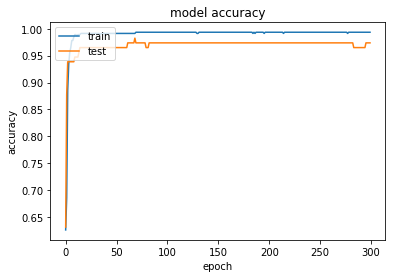

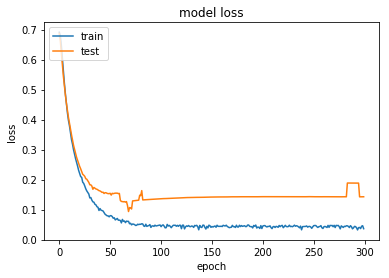

loss of train set: 0.039
accuracy of train set: 99.3%
loss of test set: 0.142
accuracy of test set: 97.4%


In [15]:
## Learning Curve of tuned model
K.clear_session()
np.random.seed(seed) 

# params
dropout_rate=0.1
activation='tanh'
init_mode='uniform'
optimizer='rmsprop'
batch_size=32
epochs=300
# train model
model = Sequential()
model.add(Dense(12, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(12, kernel_initializer=init_mode, activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(8, kernel_initializer=init_mode, activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(4, kernel_initializer=init_mode, activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), 
                    epochs=epochs, batch_size=batch_size, verbose=0)

# plot learning curve
print(history.history.keys())
#accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate model on train set
scores = model.evaluate(X_train,y_train,verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))
# evaluate model on test data
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

# Final Model 
#### param: epochs=150, batch_size=32, optimizer='rmsprop',kernel_initializer='uniform', activation='tanh'

In [16]:
K.clear_session()
np.random.seed(seed)
# params
dropout_rate=0.1
activation='tanh'
init_mode='uniform'
optimizer='rmsprop'
batch_size=32
epochs=150
# train model
model = Sequential()
model.add(Dense(12, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(12, kernel_initializer=init_mode, activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(8, kernel_initializer=init_mode, activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(4, kernel_initializer=init_mode, activation=activation))
model.add(Dropout(dropout_rate))
model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
# evaluate model on train set
scores = model.evaluate(X_train,y_train, verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))

loss of train set: 0.040
accuracy of train set: 99.3%


** Save and load the final model to JSON or YAML ** https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

** 1) JSON **

In [17]:
# save model as JSON
filename = 'model'
# model architecture
model_json = model.to_json()
with open(filename+'.json', 'w') as json_file:
    json_file.write(model_json)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.json,',filename+'.h5')

Saved model in model.json, model.h5


In [31]:
#del model

In [18]:
#load model from JSON
filename = 'model'
# model architecture
from keras.models import model_from_json
json_file = open(filename+'.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.json,',filename+'.h5')
print(model.summary())

Loaded model from model.json, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 4

In [19]:
# evaluate loaded model on test data
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

loss of test set: 0.141
accuracy of test set: 97.4%


** 2) YAML **

In [20]:
# save model as YAML
filename = 'model'
# model architecture
model_yaml= model.to_yaml()
with open(filename+'.yaml', 'w') as yaml_file:
    yaml_file.write(model_yaml)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.yaml,',filename+'.h5')

Saved model in model.yaml, model.h5


In [35]:
#load model from YAML
filename = 'model'
# model architecture
from keras.models import model_from_yaml
yaml_file = open(filename+'.json', 'r')
model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(model_yaml)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.yaml,',filename+'.h5')
print(model.summary())

Loaded model from model.yaml, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# evaluate loaded model on test data
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

loss of test set: 0.141
accuracy of test set: 97.4%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       285
          1       1.00      0.98      0.99       170

avg / total       0.99      0.99      0.99       455



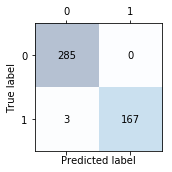

In [22]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#classification report
print(classification_report(y_train, model.predict_classes(X_train,verbose=0)))

#confusion matrix
confmat = confusion_matrix(y_train, model.predict_classes(X_train,verbose=0))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

In [23]:
# predict class with test set (new, unseen)
y_pred = model.predict_classes(X_test,verbose=0)
print('Accuracy: {:0.1f}%'.format(accuracy_score(y_test,y_pred)*100))

Accuracy: 97.4%


             precision    recall  f1-score   support

          0       0.96      1.00      0.98        72
          1       1.00      0.93      0.96        42

avg / total       0.97      0.97      0.97       114



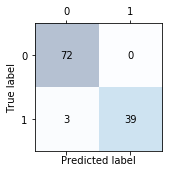

In [24]:
#classification report
print(classification_report(y_test, model.predict_classes(X_test,verbose=0)))

#confusion matrix
confmat = confusion_matrix(y_test, model.predict_classes(X_test,verbose=0))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Summary

- Model Architecture: Input layer + 4 hidden layers (12,12,8,4 neurons for each) + dropout (b/w layers) + output layer

    
- Best params: epochs=150, batch_size=32, optimizer='rmsprop',kernel_initializer='uniform', activation='tanh'
    
    
- Accuracy of test set: ** 97.4% ** (tie with SVM)